In [1]:
import pandas as pd
import numpy as np

def load_data(train_file1: str, test_file1: str, train_file2: str, test_file2: str):
  df1 = pd.read_csv(train_file1, index_col=0, header=0)
  X1 = df1.values.T[:, :-2]
  co1 = df1.iloc[-2,:].values.astype(np.int32)
  co2 = df1.iloc[-1,:].values.astype(np.int32)

  df1_test = pd.read_csv(test_file1, index_col=0, header=0)
  X1_test = df1_test.values.T

  df2 = pd.read_csv(train_file2, index_col=0, header=0)
  X2 = df2.values.T[:, :-4]
  co3 = df2.iloc[-4, :].values.astype(np.int32)
  co4 = df2.iloc[-3, :].values.astype(np.int32)
  co5 = df2.iloc[-2, :].values.astype(np.int32)
  co6 = df2.iloc[-1, :].values.astype(np.int32)

  df2_test = pd.read_csv(test_file2, index_col=0, header=0)
  X2_test = df2_test.values.T

  return X1, X2, (co1, co2, co3, co4, co5, co6), X1_test, X2_test

train_file1, test_file1 = "Dataset_1_Training.csv", "Dataset_1_Testing.csv"
train_file2, test_file2 = "Dataset_2_Training.csv", "Dataset_2_Testing.csv"

X1, X2, targets, X1_test, X2_test = load_data(train_file1, test_file1, train_file2, test_file2)
co1, co2, co3, co4, co5, co6 = targets

In [2]:
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_selection import SelectKBest, RFE
from sklearn.decomposition import PCA

In [52]:
from sklearn.decomposition import PCA

def plot_pca(X, n_components):
    pca = PCA(n_components=n_components)
    pca.fit(X)

    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid()
    plt.show()

In [53]:
X2.shape

(340, 54675)

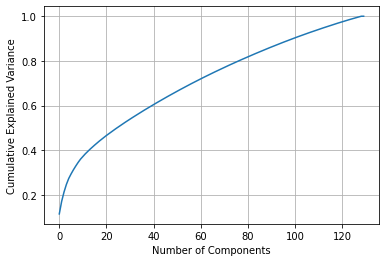

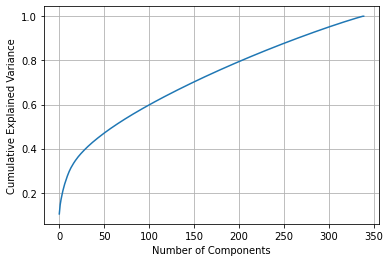

In [54]:
plot_pca(X1, n_components=130)
plot_pca(X2, n_components=340)

In [49]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

def plot_tsne(X, y, with_select_k=False, with_rfe=False, title=""):    
    if with_select_k:
        features_selector = SelectKBest(k=3000)
        features_selector.fit(X, y)
        ftrs = features_selector.get_support()
        X = X[:, ftrs]

    if with_rfe:
        pca = PCA(n_components=0.9)
        X = pca.fit_transform(X)
        rfe = RFE(SVC(kernel="linear"), step=1, n_features_to_select=70)
        X = rfe.fit_transform(X, y)

    tsne = TSNE(n_components=2, perplexity=40, n_iter=300, random_state=42)
    X = tsne.fit_transform(X)

    plt.scatter(X[y==1, 0], X[y==1, 1], c="green", marker="x", label="Positive Class")
    plt.scatter(X[y==0, 0], X[y==0, 1], c="red", marker="o", label="Negative Class")
    plt.xlabel('feature-1')
    plt.ylabel('feature-2')
    plt.legend()
    plt.title(title)
    plt.show()

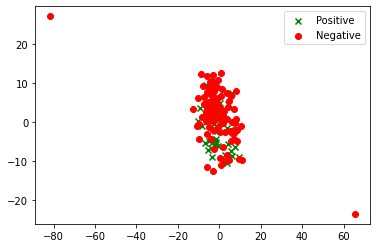

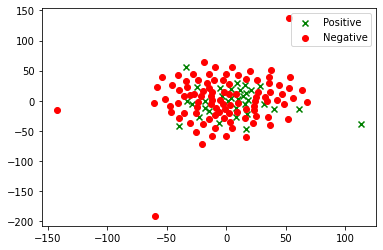

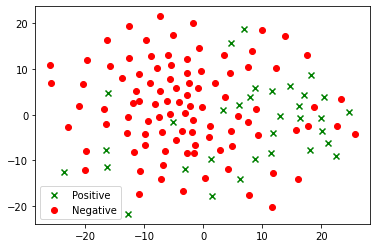

In [12]:
plot_tsne(X1, co1, with_select_k=False, with_rfe=False)
plot_tsne(X1, co1, with_select_k=False, with_rfe=True)
plot_tsne(X1, co1, with_select_k=True, with_rfe=True)

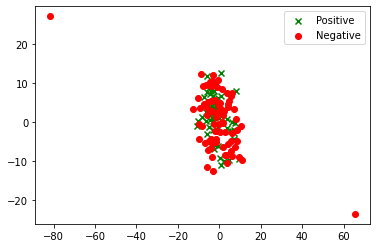

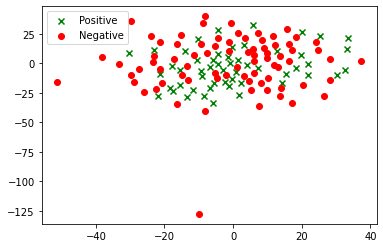

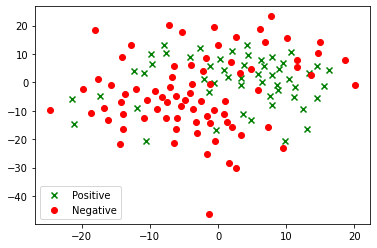

In [13]:
plot_tsne(X1, co2, with_select_k=False, with_rfe=False)
plot_tsne(X1, co2, with_select_k=False, with_rfe=True)
plot_tsne(X1, co2, with_select_k=True, with_rfe=True)

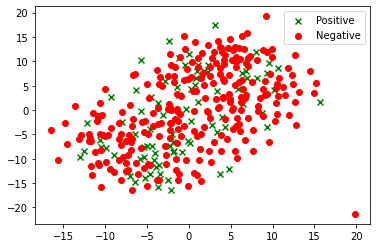

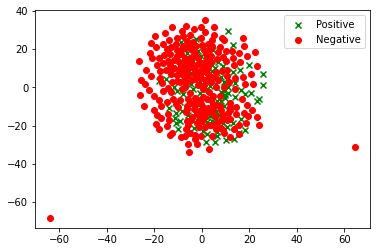

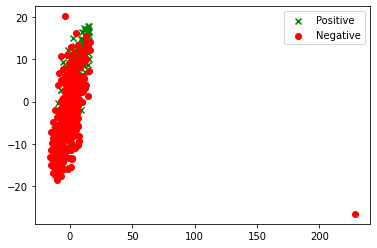

In [15]:
plot_tsne(X2, co3, with_select_k=False, with_rfe=False)
plot_tsne(X2, co3, with_select_k=False, with_rfe=True)
plot_tsne(X2, co3, with_select_k=True, with_rfe=True)

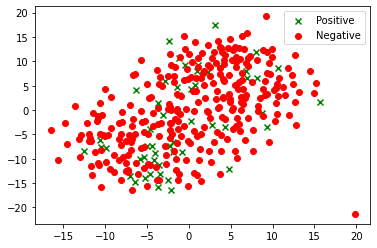

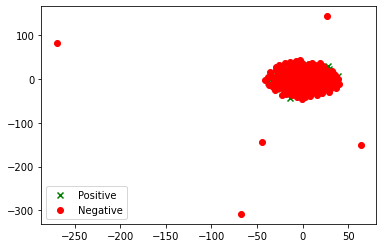

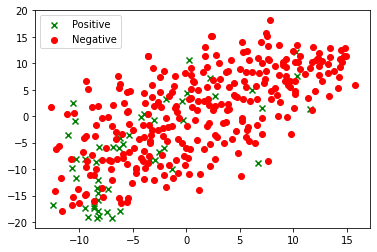

In [16]:
plot_tsne(X2, co4, with_select_k=False, with_rfe=False)
plot_tsne(X2, co4, with_select_k=False, with_rfe=True)
plot_tsne(X2, co4, with_select_k=True, with_rfe=True)

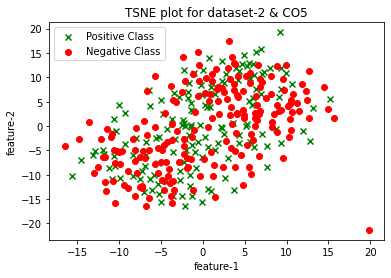

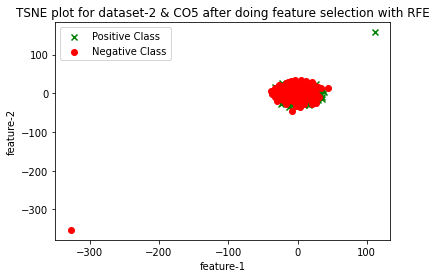

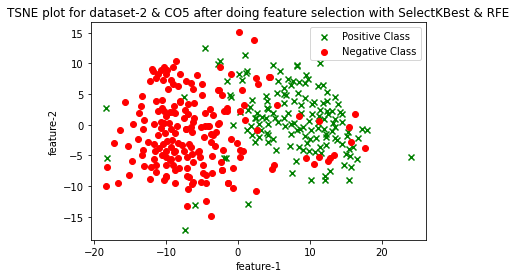

In [55]:
plot_tsne(X2, co5, with_select_k=False, with_rfe=False, title="TSNE plot for dataset-2 & CO5")
plot_tsne(X2, co5, with_select_k=False, with_rfe=True, title="TSNE plot for dataset-2 & CO5 after doing feature selection with RFE")
plot_tsne(X2, co5, with_select_k=True, with_rfe=True, title="TSNE plot for dataset-2 & CO5 after doing feature selection with SelectKBest & RFE")

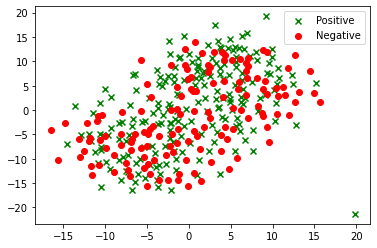

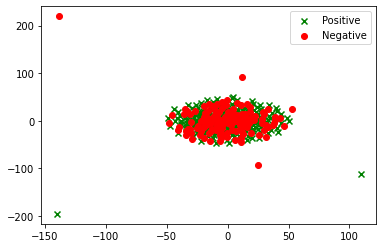

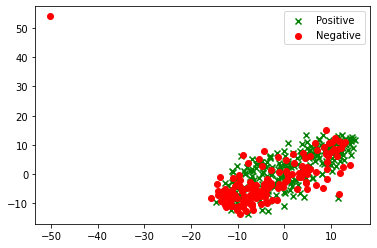

In [18]:
plot_tsne(X2, co6, with_select_k=False, with_rfe=False)
plot_tsne(X2, co6, with_select_k=False, with_rfe=True)
plot_tsne(X2, co6, with_select_k=True, with_rfe=True)

In [88]:
np.sum(co1 == co2) / len(co1)

0.4153846153846154

In [89]:
np.sum(co4 == co3) / len(co3)

0.9058823529411765

In [90]:
np.sum(co4 == co5) / len(co3)

0.55

In [91]:
np.sum(co4 == co6) / len(co3)

0.42058823529411765

In [92]:
np.sum(co5 == co6) / len(co3)

0.5117647058823529